<a href="https://colab.research.google.com/github/ovozzx/Machine-Learning/blob/master/%5BLinearRegression%5D%EB%B3%B4%EC%8A%A4%ED%84%B4_%EC%A3%BC%ED%83%9D%EA%B0%80%EA%B2%A9_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

# boston Îç∞Ïù¥ÌÉÄÏÖã Î°úÎìú
boston = load_boston()

# boston Îç∞Ïù¥ÌÉÄÏÖã DataFrame Î≥ÄÌôò 
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston datasetÏùò target arrayÎäî Ï£ºÌÉù Í∞ÄÍ≤©ÏûÑ. Ïù¥Î•º PRICE Ïª¨ÎüºÏúºÎ°ú DataFrameÏóê Ï∂îÍ∞ÄÌï®. 
bostonDF['PRICE'] = boston.target
print('Boston Îç∞Ïù¥ÌÉÄÏÖã ÌÅ¨Í∏∞ :',bostonDF.shape)
bostonDF.head()

Boston Îç∞Ïù¥ÌÉÄÏÖã ÌÅ¨Í∏∞ : (506, 14)


CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  PRICE
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98   24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14   21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03   34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94   33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33   36.2

[5 rows x 14 columns]

## feature

- CRIM: ÏßÄÏó≠Î≥Ñ Î≤îÏ£Ñ Î∞úÏÉùÎ•†

- ZN: 25,000ÌèâÎ∞©ÌîºÌä∏Î•º Ï¥àÍ≥ºÌïòÎäî Í±∞Ï£º ÏßÄÏó≠Ïùò ÎπÑÏú®

- NDUS: ÎπÑÏÉÅÏóÖ ÏßÄÏó≠ ÎÑìÏù¥ ÎπÑÏú®

- CHAS: Ï∞∞Ïä§Í∞ïÏóê ÎåÄÌïú ÎçîÎØ∏ Î≥ÄÏàò(Í∞ïÏùò Í≤ΩÍ≥ÑÏóê ÏúÑÏπòÌïú Í≤ΩÏö∞Îäî 1, ÏïÑÎãàÎ©¥ 0)

- NOX: ÏùºÏÇ∞ÌôîÏßàÏÜå ÎÜçÎèÑ

- RM: Í±∞Ï£ºÌï† Ïàò ÏûàÎäî Î∞© Í∞úÏàò

- AGE: 1940ÎÖÑ Ïù¥Ï†ÑÏóê Í±¥Ï∂ïÎêú ÏÜåÏú† Ï£ºÌÉùÏùò ÎπÑÏú®

- DIS: 5Í∞ú Ï£ºÏöî Í≥†Ïö©ÏÑºÌÑ∞ÍπåÏßÄÏùò Í∞ÄÏ§ë Í±∞Î¶¨

- RAD: Í≥†ÏÜçÎèÑÎ°ú Ï†ëÍ∑º Ïö©Ïù¥ÎèÑ

- TAX: 10,000Îã¨Îü¨Îãπ Ïû¨ÏÇ∞ÏÑ∏Ïú®

- PTRATIO: ÏßÄÏó≠Ïùò ÍµêÏÇ¨ÏôÄ ÌïôÏÉù Ïàò ÎπÑÏú®

- B: ÏßÄÏó≠Ïùò ÌùëÏù∏ Í±∞Ï£º ÎπÑÏú®

- LSTAT: ÌïòÏúÑ Í≥ÑÏ∏µÏùò ÎπÑÏú®

- MEDV: Î≥∏Ïù∏ ÏÜåÏú†Ïùò Ï£ºÌÉù Í∞ÄÍ≤©(Ï§ëÏïôÍ∞í)

Í∞Å Ïª¨ÎüºÎ≥ÑÎ°ú Ï£ºÌÉùÍ∞ÄÍ≤©Ïóê ÎØ∏ÏπòÎäî ÏòÅÌñ•ÎèÑÎ•º Ï°∞ÏÇ¨

‚úì sns.regplot : ÏÇ∞Ï†êÎèÑ + Ï∂îÏÑ∏ÏÑ†(ÌöåÍ∑ÄÏßÅÏÑ†), ÏÑ†Ïùò ÏúÑÏïÑÎûòÎ°ú ÏòÖÍ≤å ÌëúÏãúÎêú Î∂ÄÎ∂ÑÏùÄ Ï∂îÏÑ∏ÏÑ†Ïùò 95% Ïã†Î¢∞Íµ¨Í∞ÑÏùÑ ÎÇòÌÉÄÎÉÖÎãàÎã§.

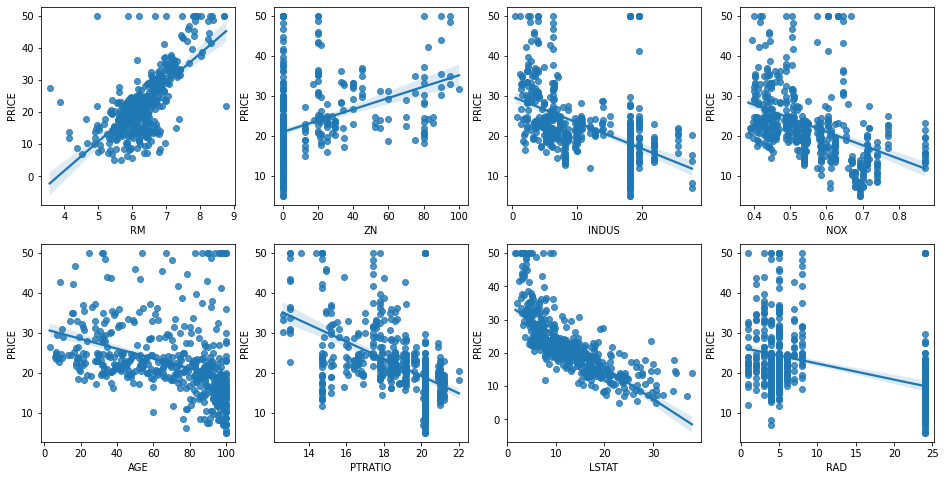

In [4]:
# 2Í∞úÏùò ÌñâÍ≥º 4Í∞úÏùò Ïó¥ÏùÑ Í∞ÄÏßÑ subplotsÎ•º Ïù¥Ïö©. axsÎäî 4x2Í∞úÏùò axÎ•º Í∞ÄÏßê.
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD'] #8Í∞úÏùò feature & price 
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # ÏãúÎ≥∏Ïùò regplotÏùÑ Ïù¥Ïö©Ìï¥ ÏÇ∞Ï†êÎèÑÏôÄ ÏÑ†Ìòï ÌöåÍ∑Ä ÏßÅÏÑ†ÏùÑ Ìï®Íªò ÌëúÌòÑ
    sns.regplot(x=feature , y='PRICE',data=bostonDF , ax=axs[row][col])

## ÌïôÏäµÍ≥º ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Î°ú Î∂ÑÎ¶¨ÌïòÍ≥† ÌïôÏäµ/ÏòàÏ∏°/ÌèâÍ∞Ä ÏàòÌñâ

- r2_score : R^2, Î∂ÑÏÇ∞ Í∏∞Î∞òÏúºÎ°ú ÏòàÏ∏° ÏÑ±Îä• ÌèâÍ∞Ä ( ÏòàÏ∏° Î∂ÑÏÇ∞ / Ïã§Ï†ú Î∂ÑÏÇ∞ ), 1Ïóê Í∞ÄÍπåÏö∏ÏàòÎ°ù ÏòàÏ∏° Ï†ïÌôïÎèÑ ÎÜíÏùå

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

# Linear Regression OLSÎ°ú ÌïôÏäµ/ÏòàÏ∏°/ÌèâÍ∞Ä ÏàòÌñâ. 
lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297 , RMSE : 4.159
Variance score : 0.757


In [6]:
print('Ï†àÌé∏ Í∞í:',lr.intercept_)
print('ÌöåÍ∑Ä Í≥ÑÏàòÍ∞í:', np.round(lr.coef_, 1))

Ï†àÌé∏ Í∞í: 40.995595172164755
ÌöåÍ∑Ä Í≥ÑÏàòÍ∞í: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [7]:
# ÌöåÍ∑Ä Í≥ÑÏàòÎ•º ÌÅ∞ Í∞í ÏàúÏúºÎ°ú Ï†ïÎ†¨ÌïòÍ∏∞ ÏúÑÌï¥ SeriesÎ°ú ÏÉùÏÑ±. indexÍ∞Ä Ïª¨ÎüºÎ™ÖÏóê Ïú†Ïùò
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns )
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

‚úì cross_val_score : ÍµêÏ∞® Í≤ÄÏ¶ù

üí° neg_mean_squared_error : Î∞òÌôòÎêòÎäî ÏàòÏπòÍ∞í ÏùåÏàò!

ÏÇ¨Ïù¥ÌÇ∑Îü∞Ïùò Scoring Ìï®ÏàòÍ∞Ä score Í∞íÏù¥ ÌÅ¥Ïä§Î°ù Ï¢ãÏùÄ ÌèâÍ∞Ä Í≤∞Í≥ºÎ°ú ÏûêÎèô ÌèâÍ∞ÄÌïòÍ∏∞ ÎïåÎ¨∏Ïóê
(ÌöåÍ∑ÄÎäî MSE Í∞íÏù¥ ÌÅ¥ÏàòÎ°ù ÎÇòÏÅú Î™®Îç∏)
 ÏùåÏàòÎ°ú ÎßåÎì§Ïñ¥ÏÑú Îçî ÌÅ∞ Ïà´ÏûêÎ°ú Ïù∏ÏãùÌïòÎèÑÎ°ù 
 
 ex)
 
  10 > 1  
 
  -1 > - 10



In [8]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)
lr = LinearRegression()

# cross_val_score( )Î°ú 5 Fold ÏÖãÏúºÎ°ú MSE Î•º Íµ¨Ìïú Îí§ Ïù¥Î•º Í∏∞Î∞òÏúºÎ°ú Îã§Ïãú  RMSE Íµ¨Ìï®. 
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")Î°ú Î∞òÌôòÎêú Í∞íÏùÄ Î™®Îëê ÏùåÏàò 
print(' 5 folds Ïùò Í∞úÎ≥Ñ Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds Ïùò Í∞úÎ≥Ñ RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds Ïùò ÌèâÍ∑† RMSE : {0:.3f} '.format(avg_rmse))

 5 folds Ïùò Í∞úÎ≥Ñ Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds Ïùò Í∞úÎ≥Ñ RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
 5 folds Ïùò ÌèâÍ∑† RMSE : 5.829 
